<a href="https://colab.research.google.com/github/dele22922/tarea3_feat_eng/blob/main/Ejercicio_Museo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TAREA MODELADO DE REDES, -EJERCICIO MUSEO -CAMARAS MINIMAS VIGILAR 13 PUERTAS DE 8 SALAS DE UN MUSEO**

VICTOR ERNESTO DE LEON MULLER CARNET 22922

CURSO BUSINESS ANALYTICS MODELS

ANTONIO MEDRANO UVG

TIGO GT

In [2]:
## Importar librerias
!pip install pulp
from pulp import *
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 27.4 MB/s eta 0:00:00


## Camaras mínimas necesarias en las puertas para vigilar el Museo (8 salas y 13 puertas).

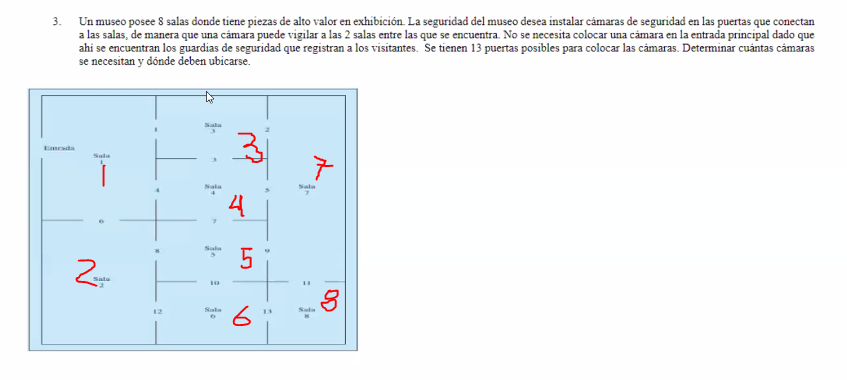

In [65]:
m2 = np.array([[1,0,0,1,0,1,0,0,0,0,0,0,0],[0,0,0,0,0,1,0,1,0,0,0,1,0],[1,1,1,0,0,0,0,0,0,0,0,0,0],[0,0,1,1,1,0,1,0,0,0,0,0,0],[0,0,0,0,0,1,1,1,1,0,0,0,0],[0,0,0,0,0,0,0,0,0,1,0,1,1],[0,1,0,0,1,0,0,0,1,0,1,0,0],[0,0,0,0,0,0,0,0,0,0,1,0,1]])
m2

array([[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1],
       [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]])

In [24]:
m2= np.array([[]])

In [66]:
m2

array([[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1],
       [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]])

In [67]:
numvar2 = m2.shape[1]

In [68]:
x2 = LpVariable.matrix('x',range(1,numvar2+1),0,None,'Integer')

In [69]:
losas = LpProblem("Losas",LpMinimize)

In [70]:
losas += lpSum([x2[i] for i in range(numvar2)])

In [71]:
losas

Losas:
MINIMIZE
1*x_1 + 1*x_10 + 1*x_11 + 1*x_12 + 1*x_13 + 1*x_2 + 1*x_3 + 1*x_4 + 1*x_5 + 1*x_6 + 1*x_7 + 1*x_8 + 1*x_9 + 0
VARIABLES
0 <= x_1 Integer
0 <= x_10 Integer
0 <= x_11 Integer
0 <= x_12 Integer
0 <= x_13 Integer
0 <= x_2 Integer
0 <= x_3 Integer
0 <= x_4 Integer
0 <= x_5 Integer
0 <= x_6 Integer
0 <= x_7 Integer
0 <= x_8 Integer
0 <= x_9 Integer

In [72]:
for i in m2.dot(x2):
    losas += i >= 1

In [73]:
losas

Losas:
MINIMIZE
1*x_1 + 1*x_10 + 1*x_11 + 1*x_12 + 1*x_13 + 1*x_2 + 1*x_3 + 1*x_4 + 1*x_5 + 1*x_6 + 1*x_7 + 1*x_8 + 1*x_9 + 0
SUBJECT TO
_C1: x_1 + x_4 + x_6 >= 1

_C2: x_12 + x_6 + x_8 >= 1

_C3: x_1 + x_2 + x_3 >= 1

_C4: x_3 + x_4 + x_5 + x_7 >= 1

_C5: x_6 + x_7 + x_8 + x_9 >= 1

_C6: x_10 + x_12 + x_13 >= 1

_C7: x_11 + x_2 + x_5 + x_9 >= 1

_C8: x_11 + x_13 >= 1

VARIABLES
0 <= x_1 Integer
0 <= x_10 Integer
0 <= x_11 Integer
0 <= x_12 Integer
0 <= x_13 Integer
0 <= x_2 Integer
0 <= x_3 Integer
0 <= x_4 Integer
0 <= x_5 Integer
0 <= x_6 Integer
0 <= x_7 Integer
0 <= x_8 Integer
0 <= x_9 Integer

In [74]:
losas.solve()

1

In [75]:
for v in losas.variables():
    print(v, v.varValue)

x_1 0.0
x_10 0.0
x_11 0.0
x_12 0.0
x_13 1.0
x_2 1.0
x_3 1.0
x_4 0.0
x_5 0.0
x_6 1.0
x_7 0.0
x_8 0.0
x_9 0.0


### **Solución : 4 puertas 2,3,6,13.**